In [ ]:
!nvidia-smi

Wed Nov  6 15:46:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 51.6 MB/s eta 0:00:00


**Step 02 # Import All the Requried Libraries**

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Step # 03 Download Dataset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="m7XPAd6FR9wPevWEw9jl")
project = rf.workspace("ankitprojecta").project("sign-language-detection-tfb93")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sign-Language-Detection-1 in yolov11:: 100%|██████████| 1048/1048 [00:00<00:00, 7383.78it/s]


In [ ]:
!unzip sign_data.zip

Archive:  sign_data.zip
  inflating: data.yaml               
   creating: test/images/
  inflating: test/images/Hello.82af5cd8-a6d1-11ec-a2fc-84a93ea18ae6.jpg  
  inflating: test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6 - Copy.jpg  
  inflating: test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6.jpg  
  inflating: test/images/Hello.8c5b98c8-a6d1-11ec-a905-84a93ea18ae6.jpg  
  inflating: test/images/Hello.8d922278-a6d1-11ec-9c17-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.01279dee-a6d2-11ec-a775-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.0391a1b8-a6d2-11ec-9246-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.04c7764c-a6d2-11ec-998a-84a93ea18ae6 - Copy.jpg  
  inflating: test/images/IloveYou.04c7764c-a6d2-11ec-998a-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.05fc3c80-a6d2-11ec-ba0a-84a93ea18ae6.jpg  
  inflating: test/images/No.b81769f8-a6d1-11ec-8d33-84a93ea18ae6.jpg  
  inflating: test/images/No.b94ba4ee-a6d1-11ec-b2ba-84a93ea18ae6.jpg  
 

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data="/content/Sign-Language-Detection-1/data.yaml" model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 309MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Sign-Language-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

**Step # 05 Examine Training Results**

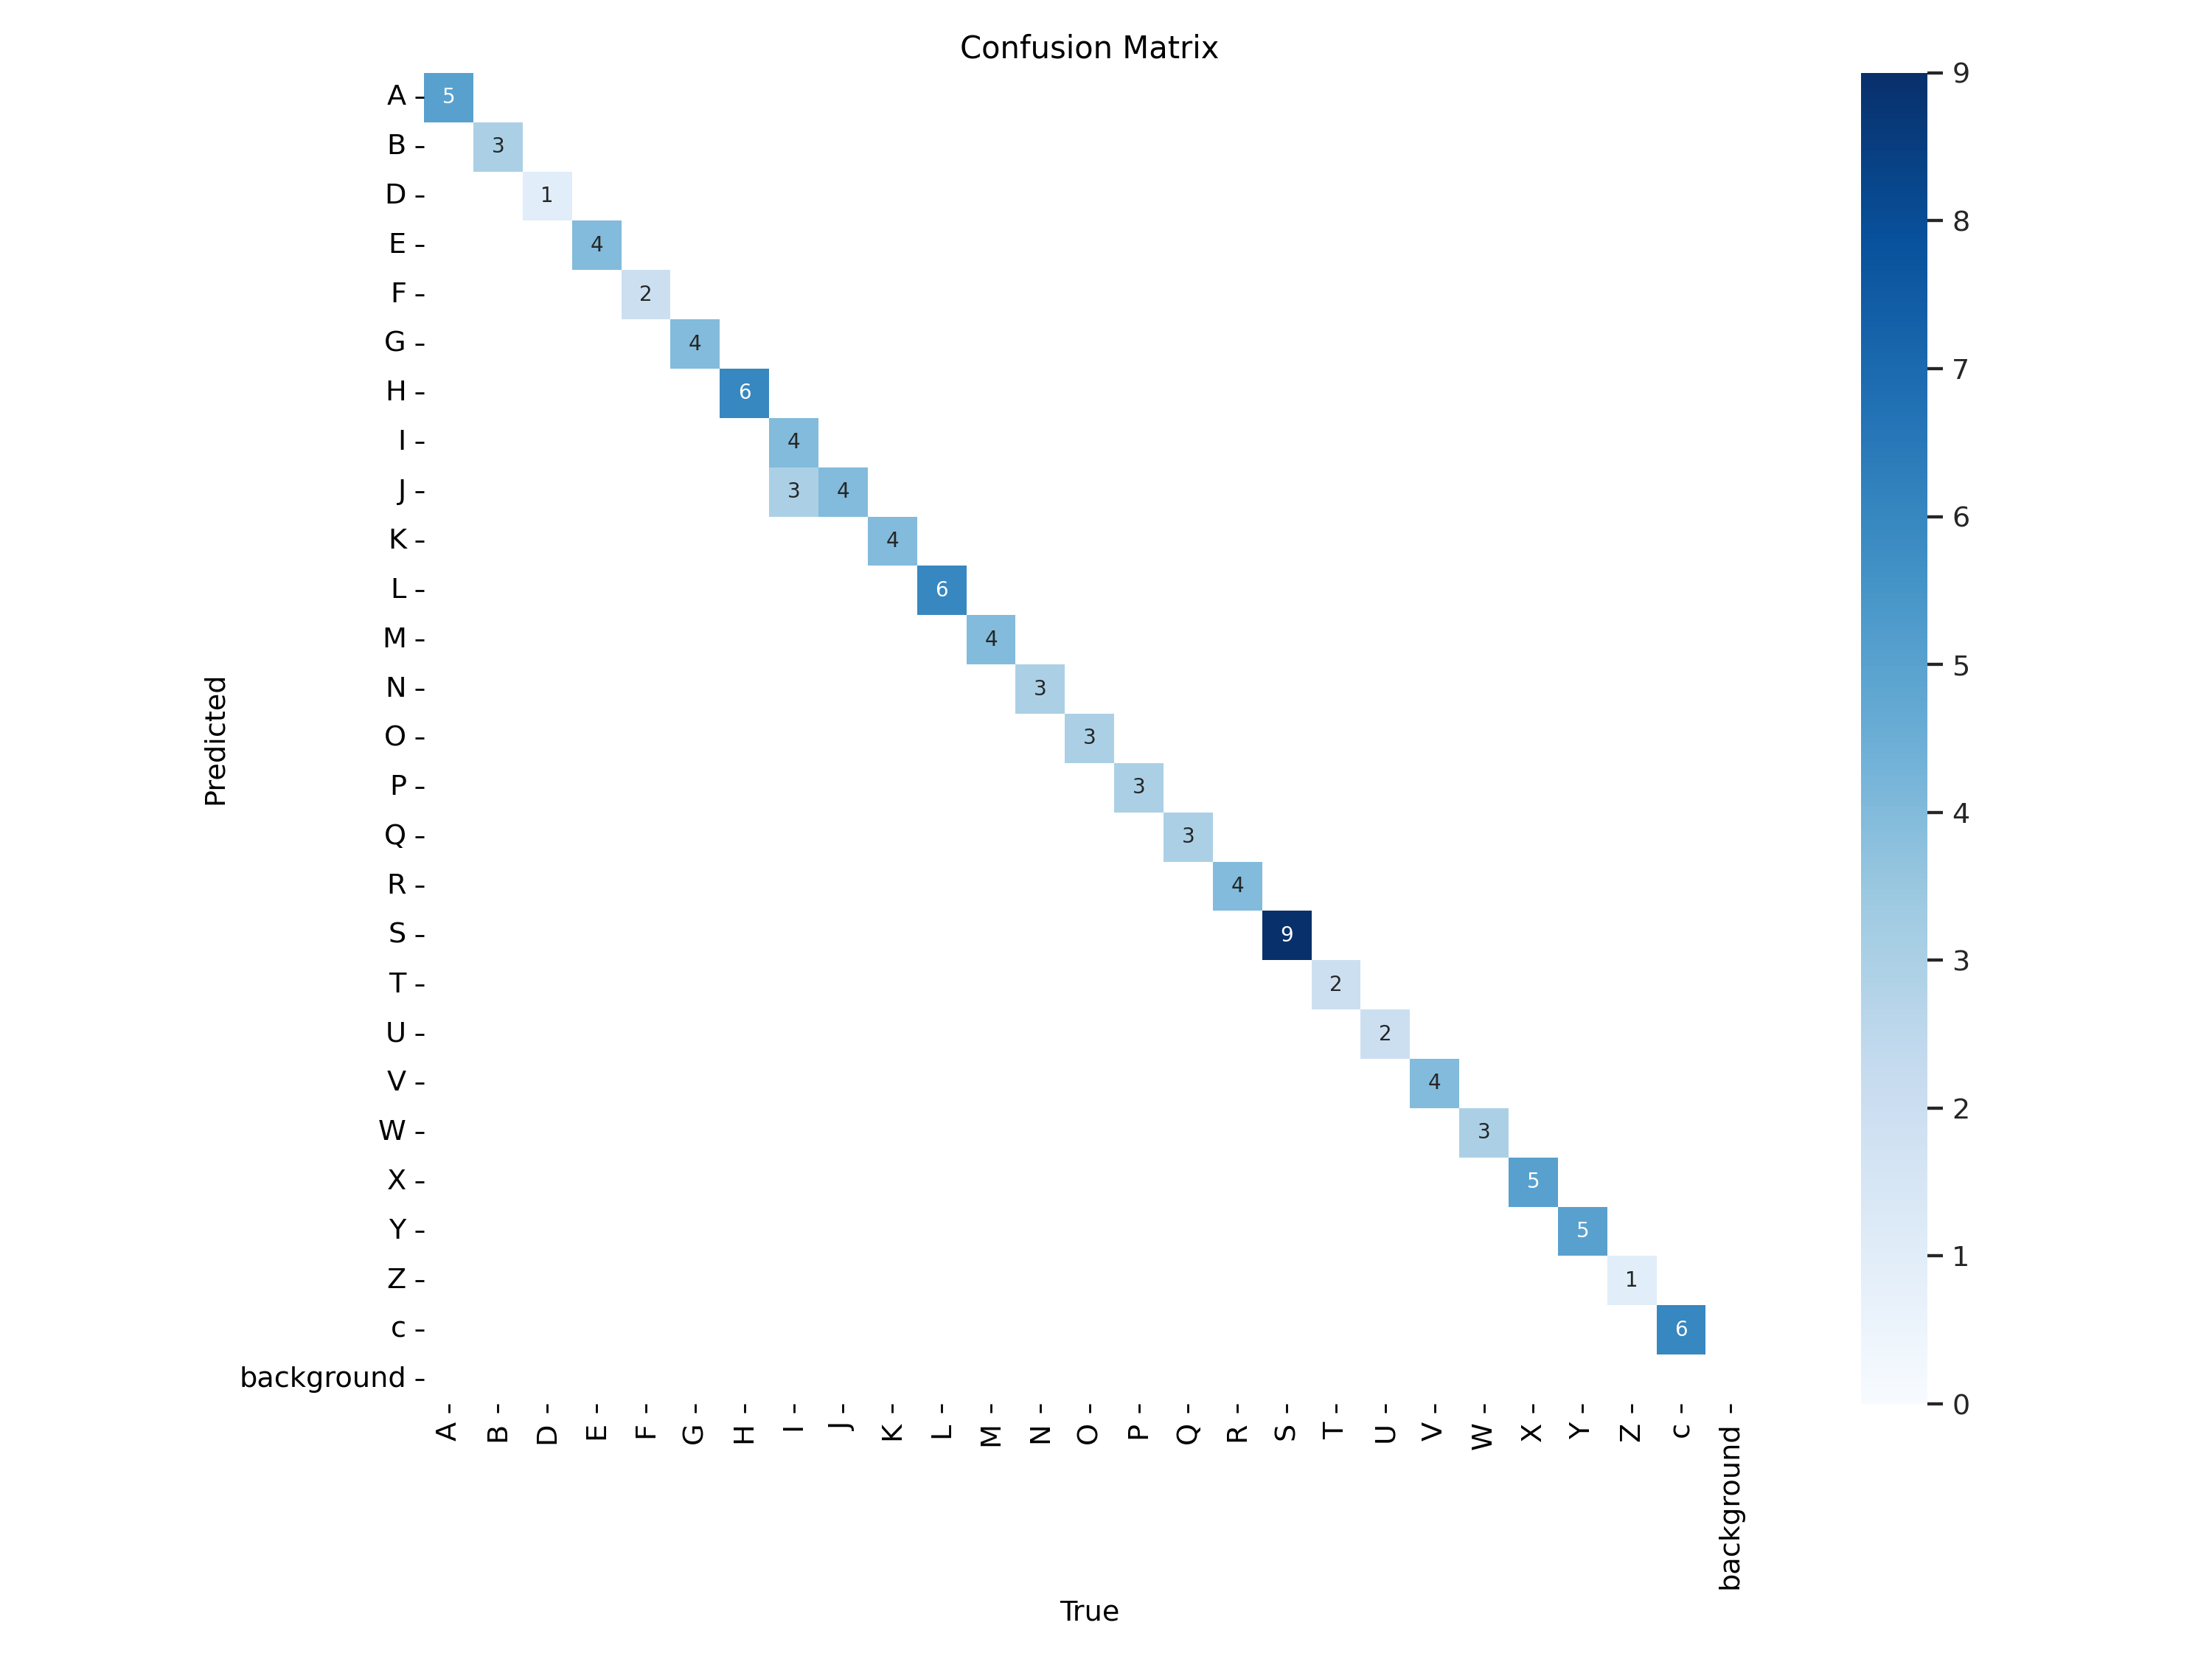

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

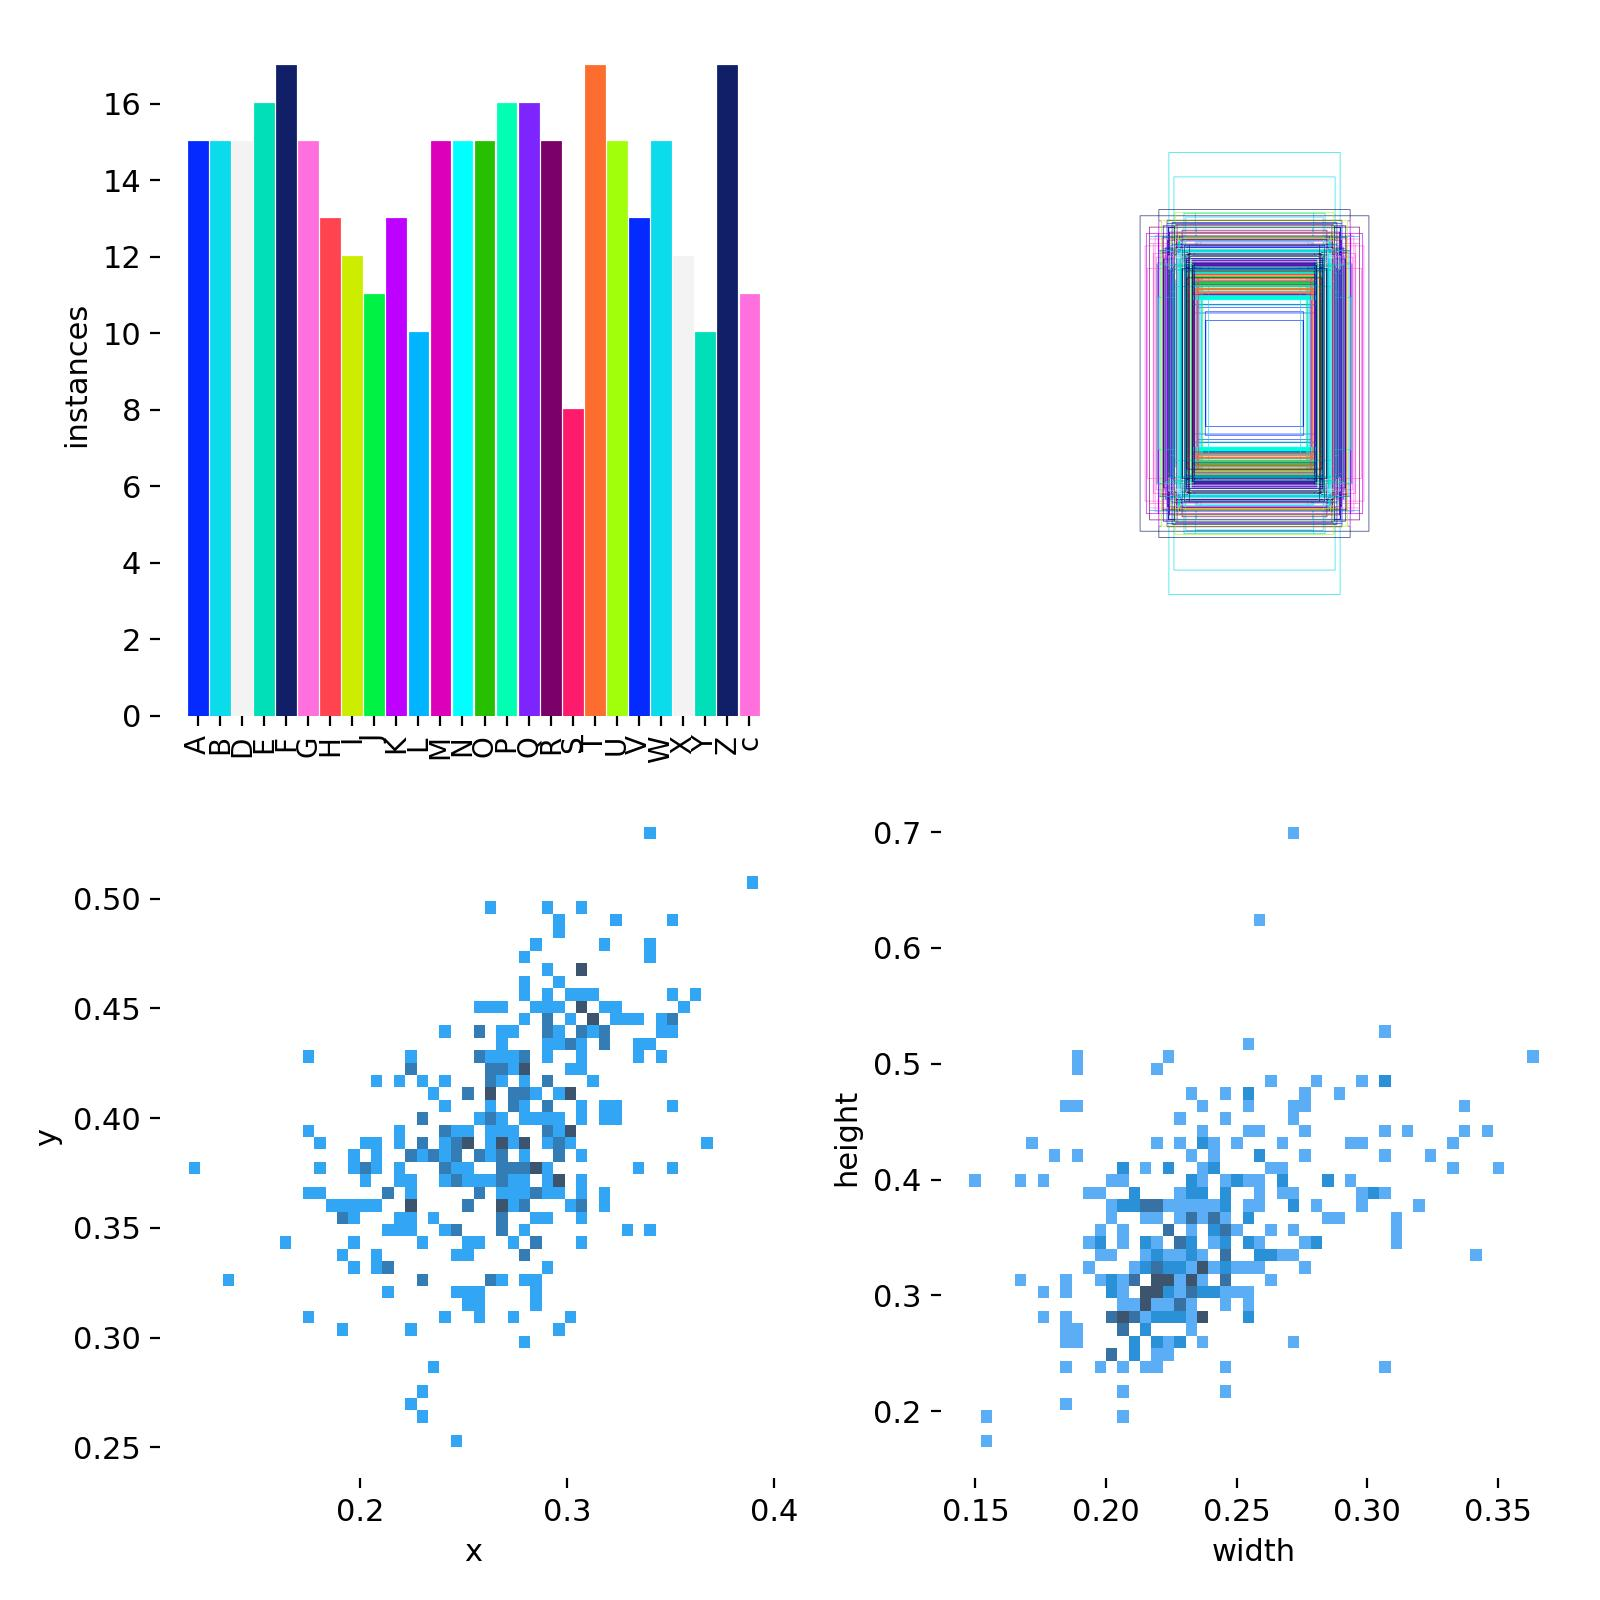

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

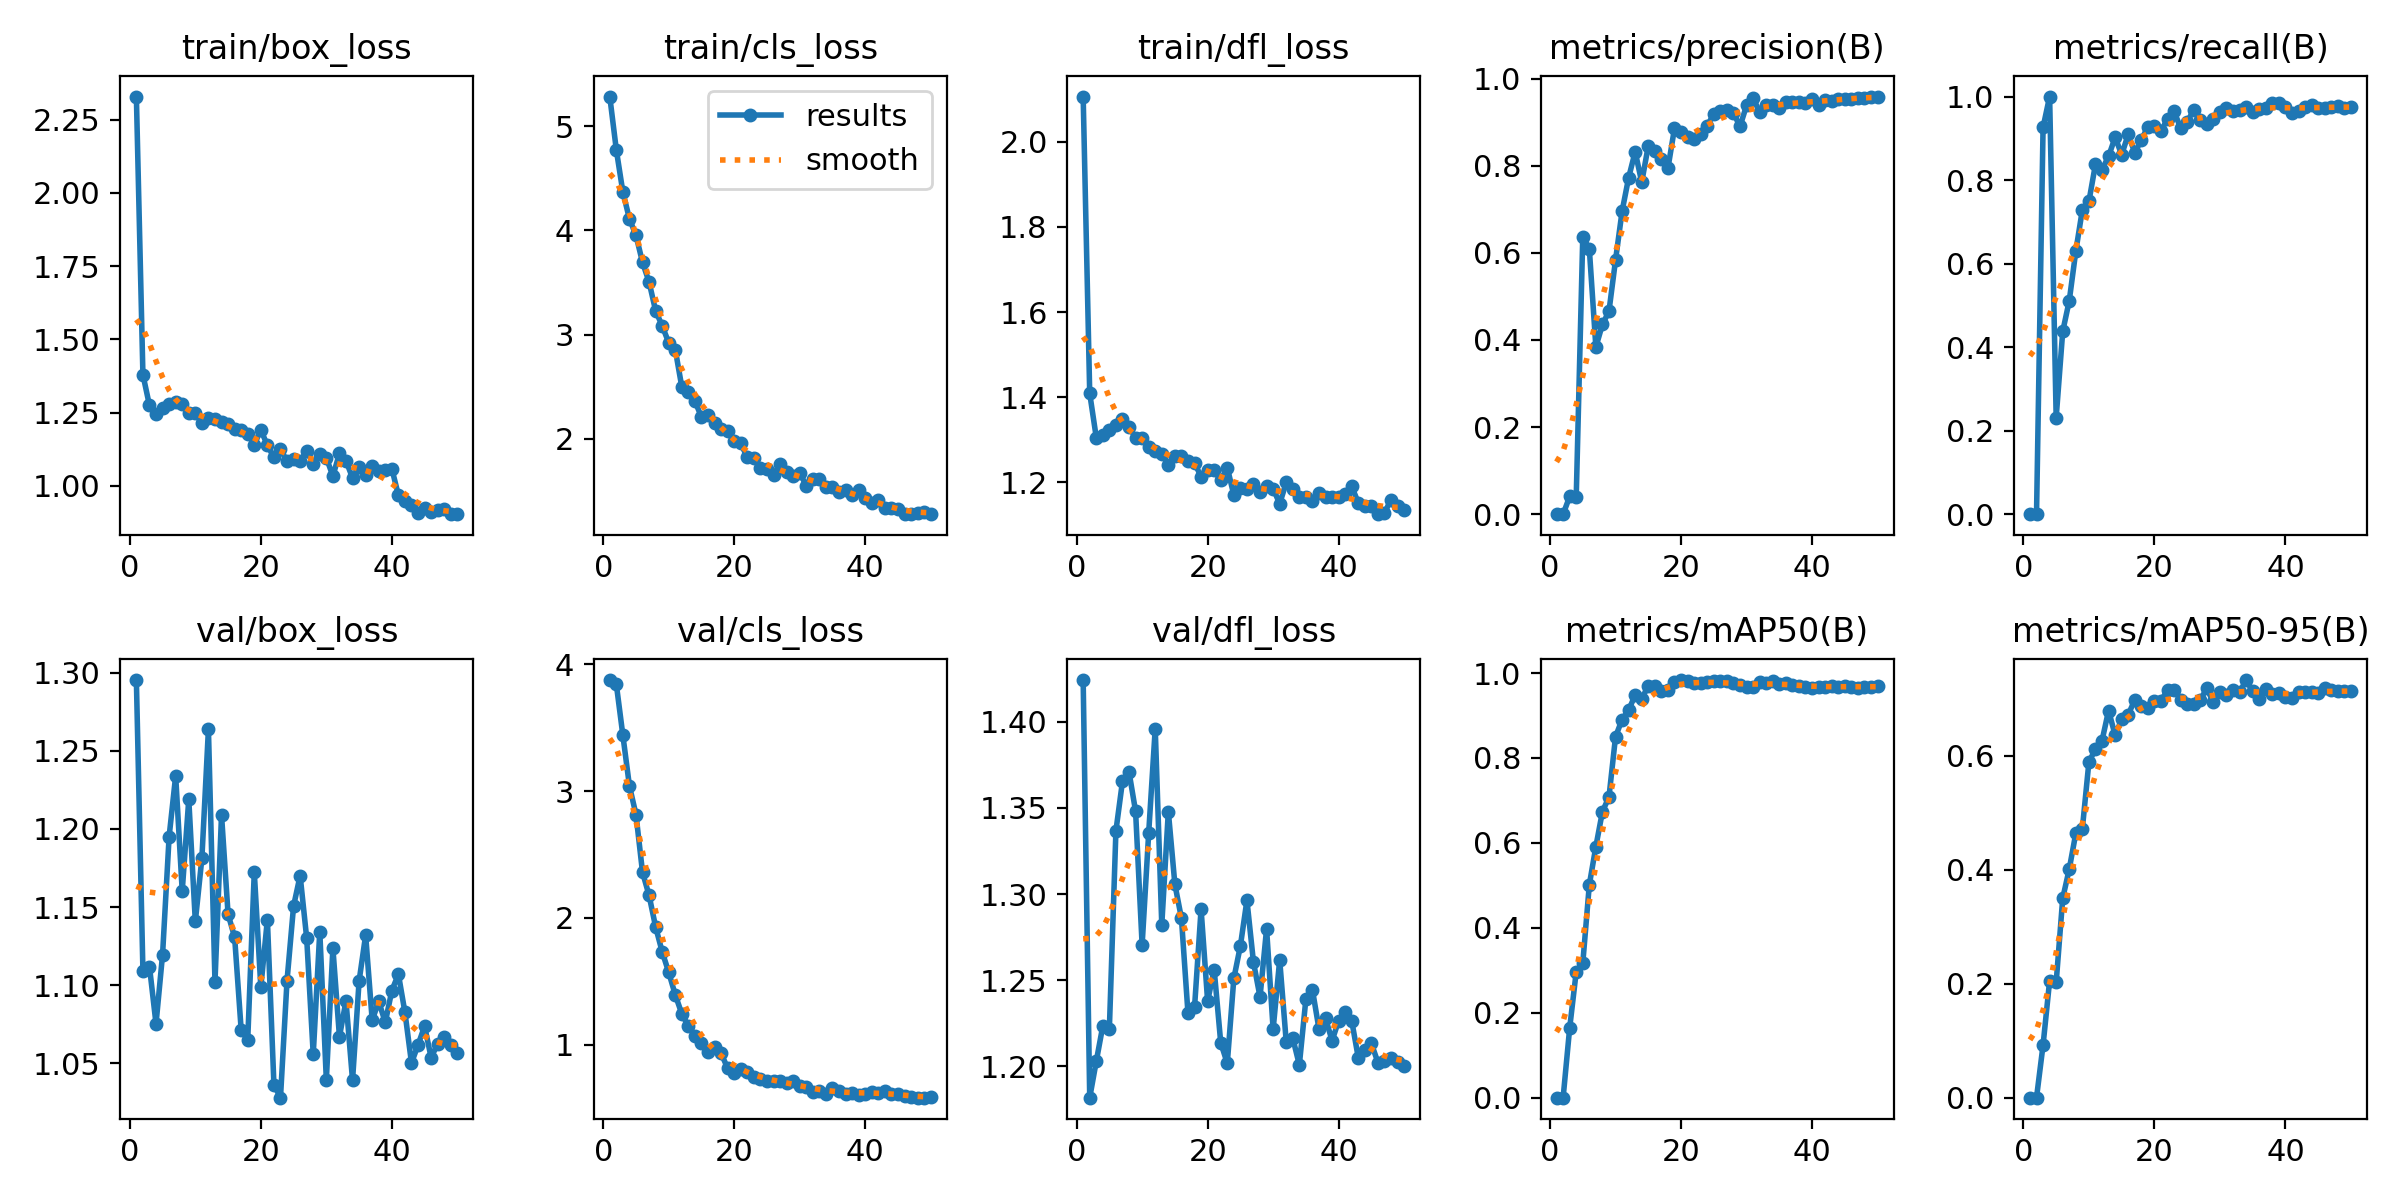

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

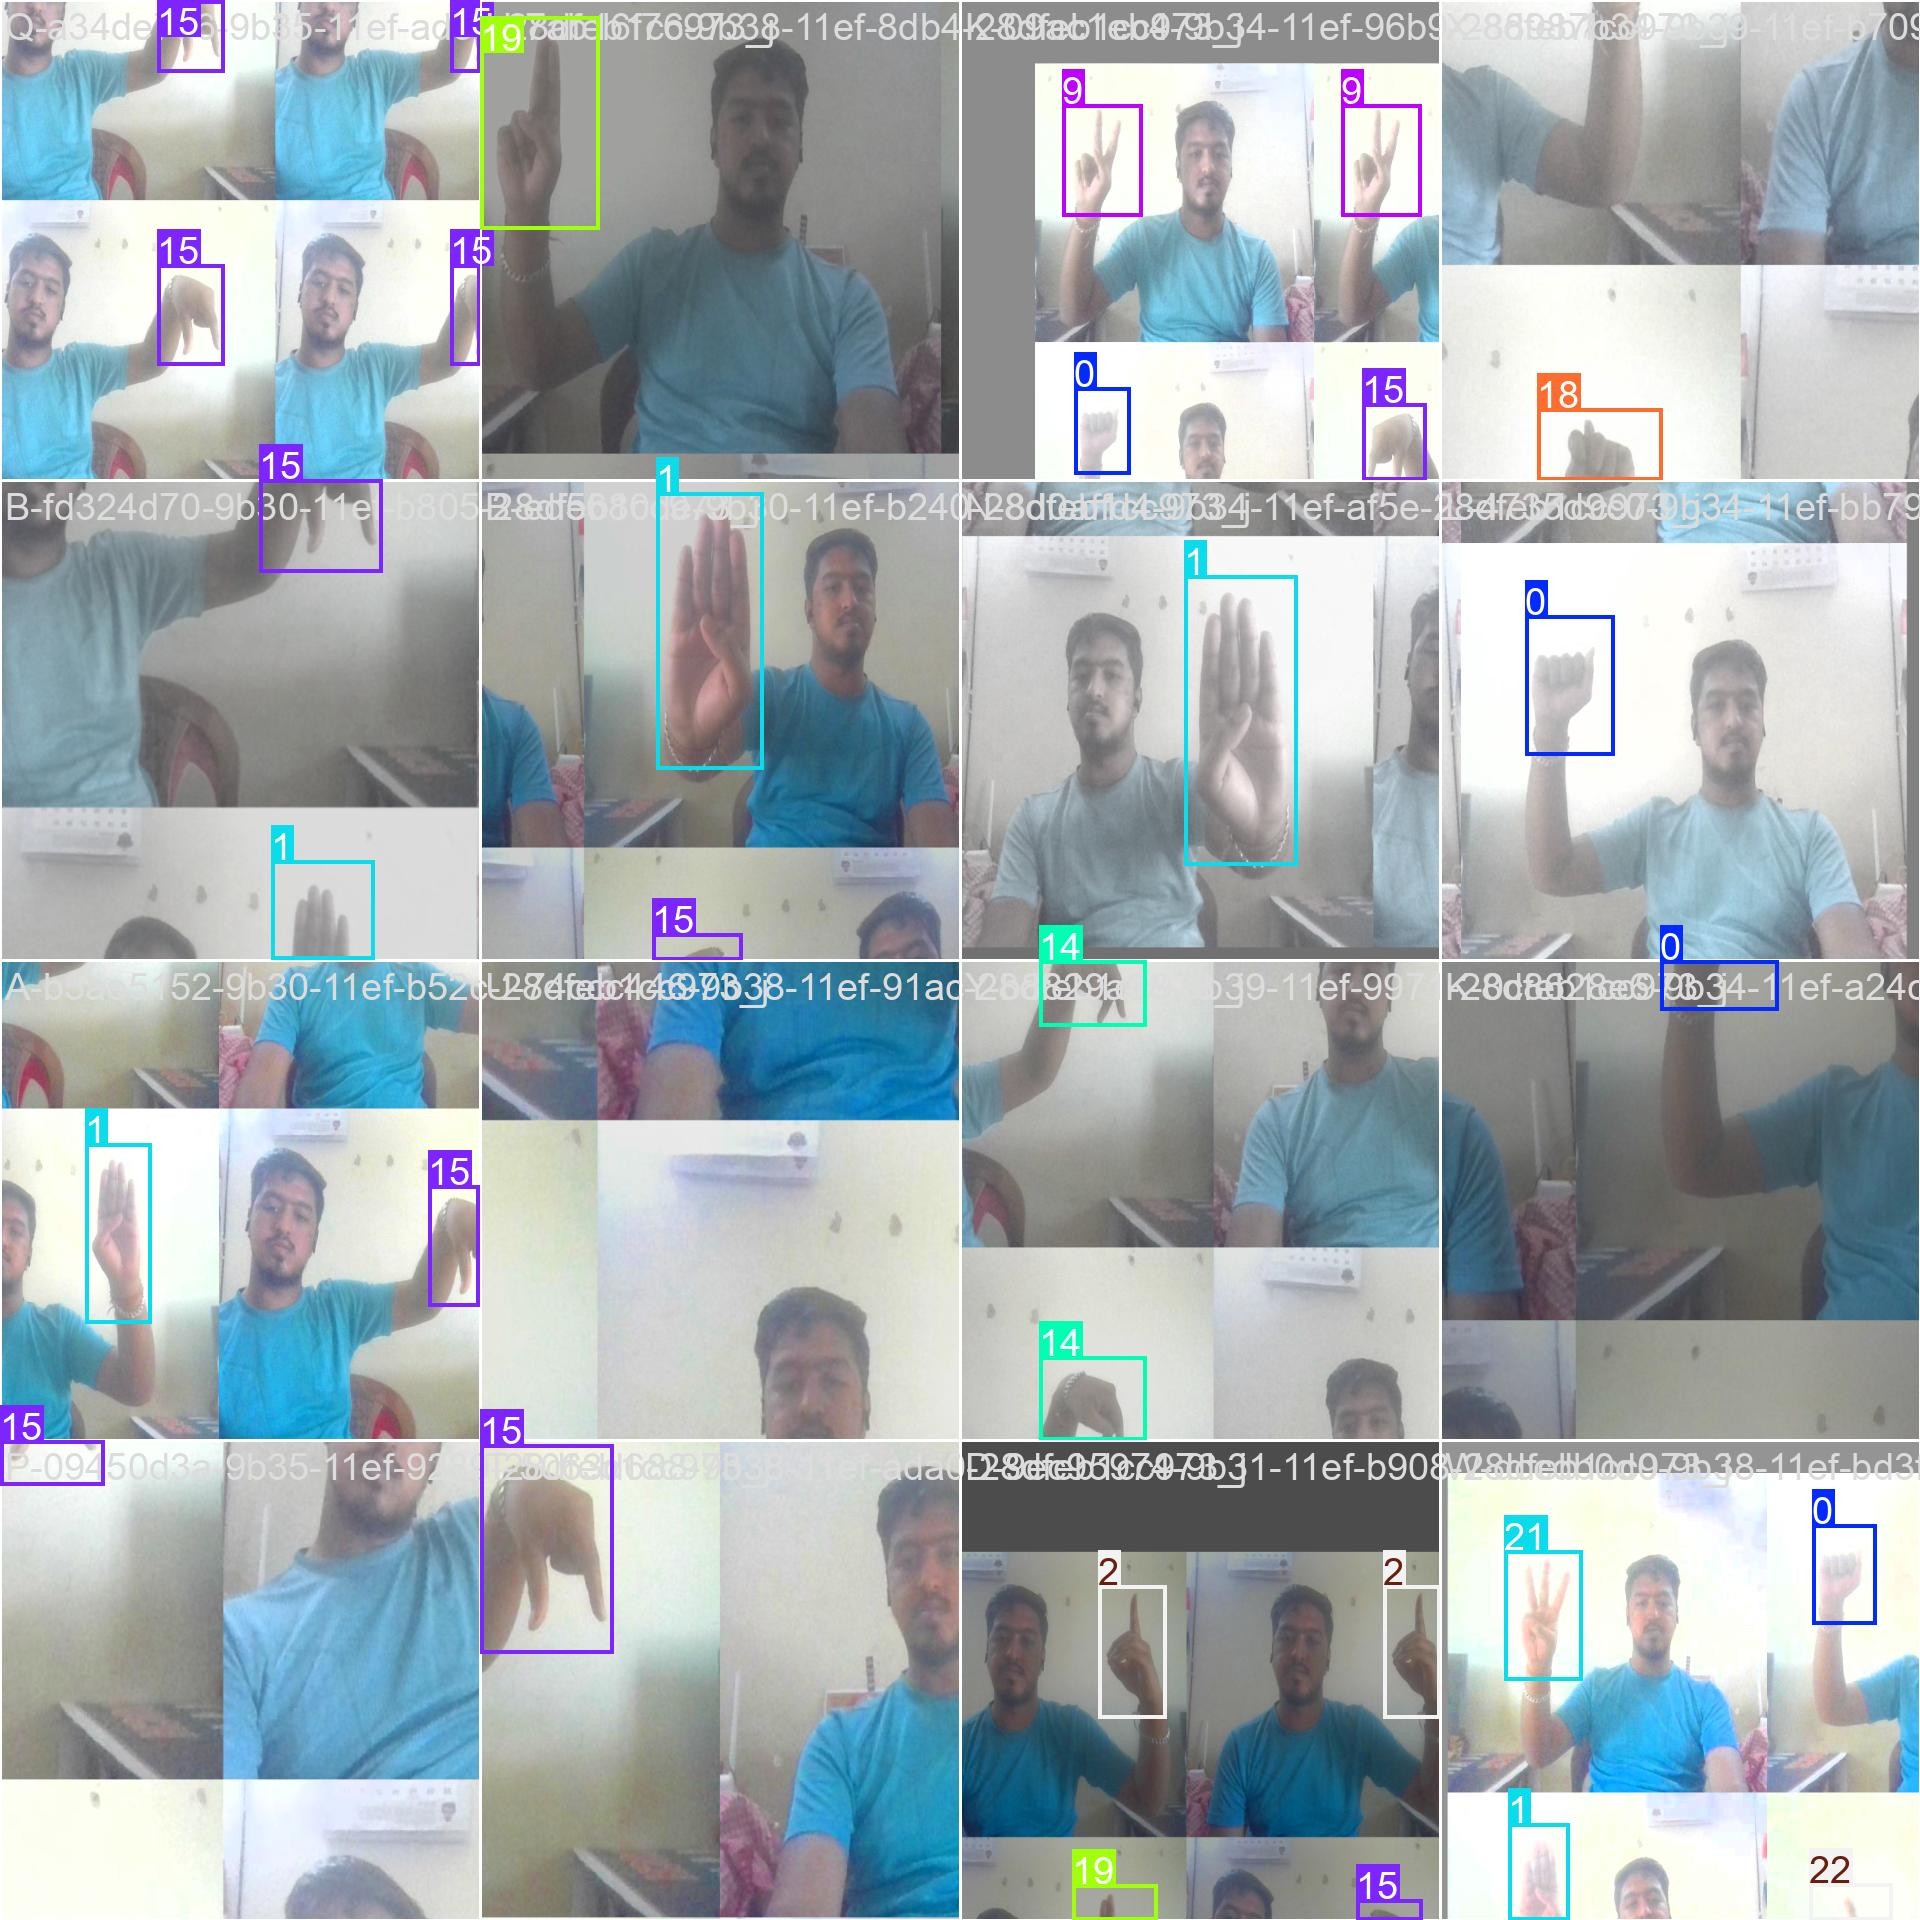

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

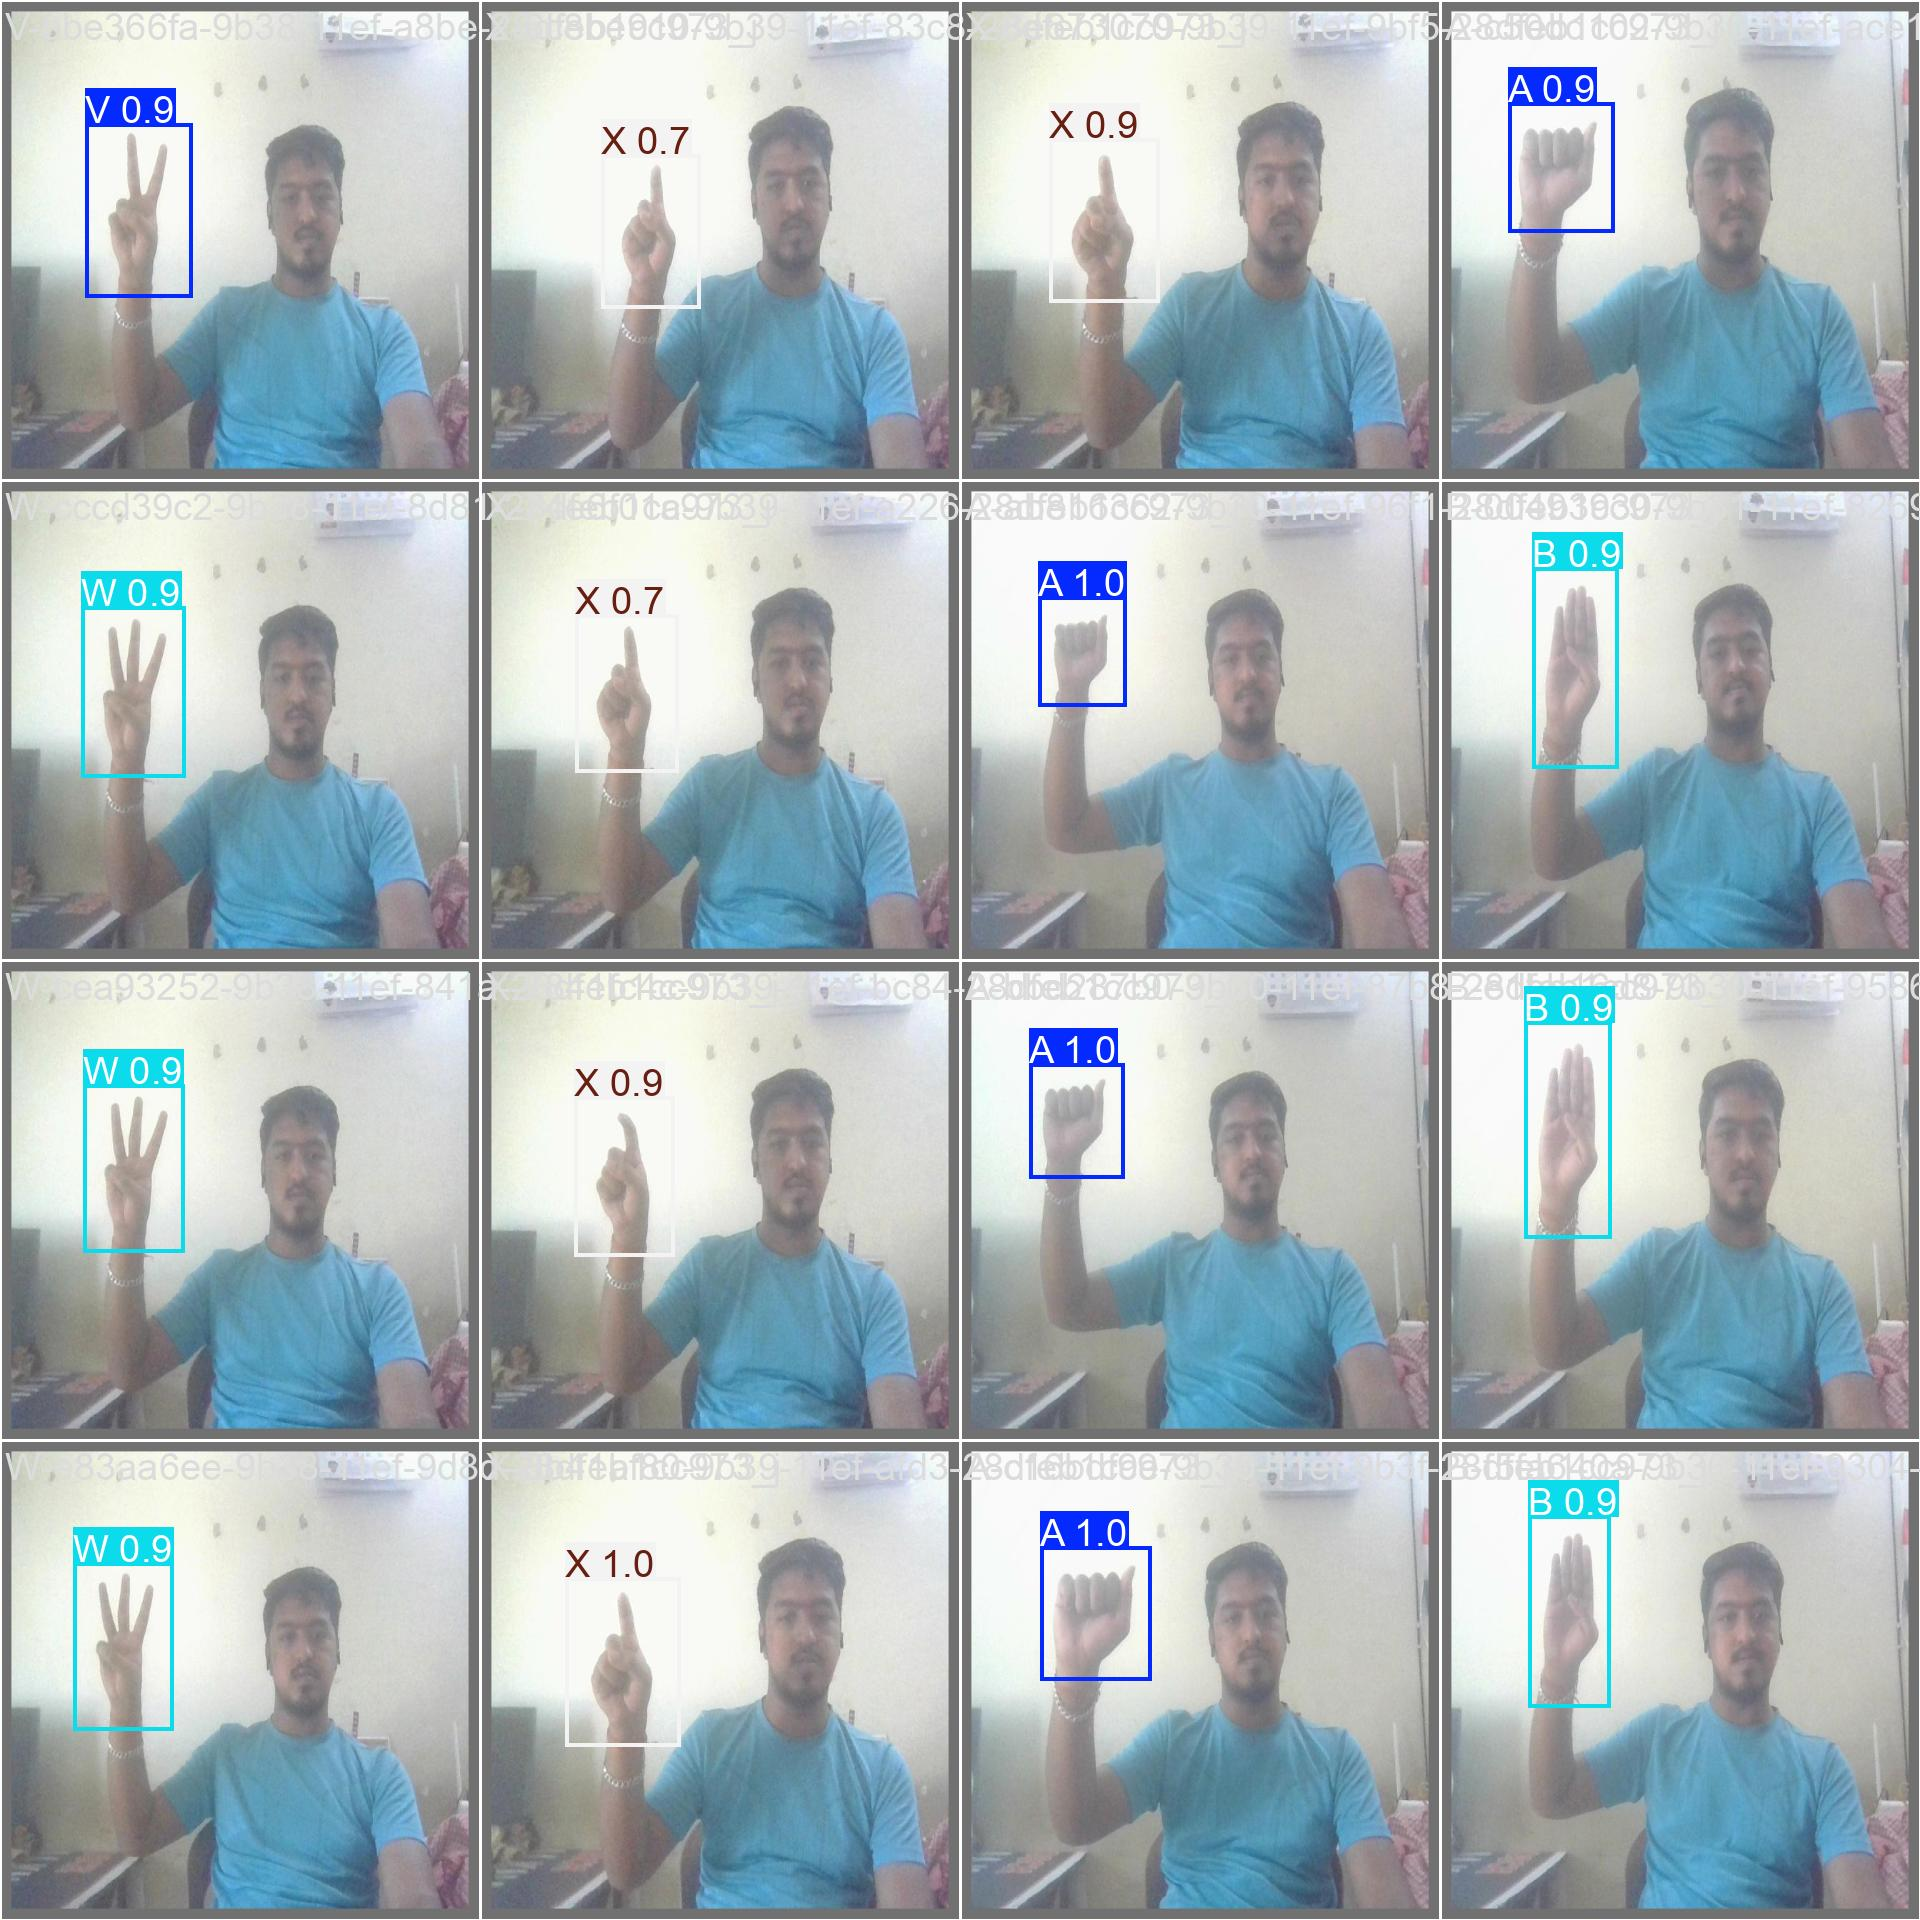

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/Sign-Language-Detection-1/test/images" save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs

image 1/52 /content/Sign-Language-Detection-1/test/images/B-08621136-9b31-11ef-9221-28dfeb1cc973_jpg.rf.4a5af5196e2ef3a7636c7bf20e0a23dd.jpg: 640x640 1 B, 13.0ms
image 2/52 /content/Sign-Language-Detection-1/test/images/B-f021a474-9b30-11ef-ae60-28dfeb1cc973_jpg.rf.6ee59188bfec3e4a402938866fdff941.jpg: 640x640 1 B, 8.6ms
image 3/52 /content/Sign-Language-Detection-1/test/images/C-164f8912-9b31-11ef-8b59-28dfeb1cc973_jpg.rf.bae7b1f7a3c41742efbef6346ca4ec2e.jpg: 640x640 1 c, 8.1ms
image 4/52 /content/Sign-Language-Detection-1/test/images/C-184ddf14-9b31-11ef-a01e-28dfeb1cc973_jpg.rf.80a19f9f1a97b80f8a2f53bd25768124.jpg: 640x640 1 c, 8.0ms
image 5/52 /content/Sign-Language-Detection-1/test/images/D-847e39a4-9b31-11ef-af5f-28dfeb1cc973_jpg.rf.240b8e0b9acb66ed15728d9ee850646c.jpg: 640x640 1 D, 8.1ms
image 6/52 /content/Sign-Lan

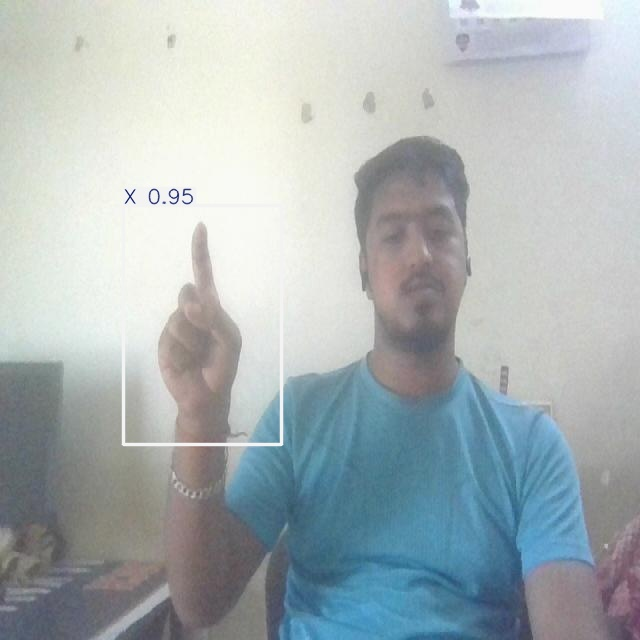

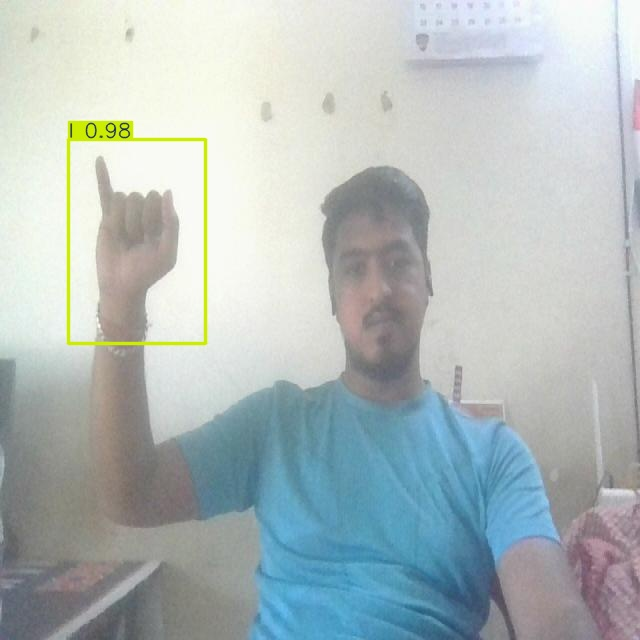

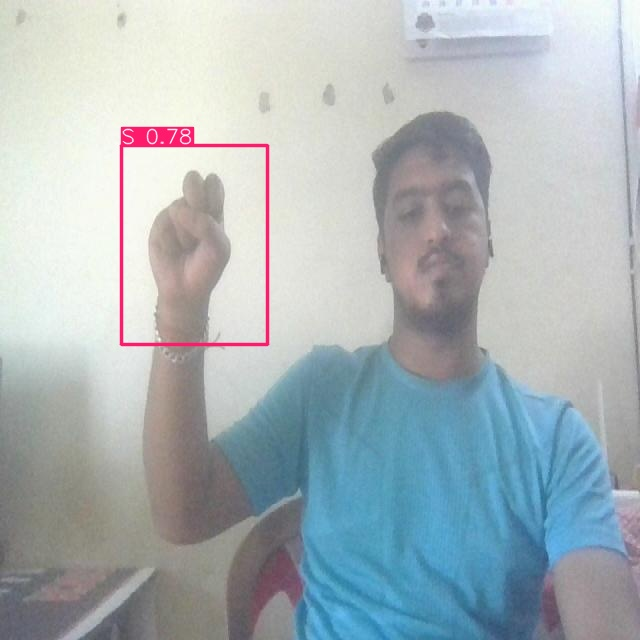

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/myphoto.jpg" save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/myphoto.jpg: 480x640 1 Z, 74.0ms
Speed: 2.8ms preprocess, 74.0ms inference, 741.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


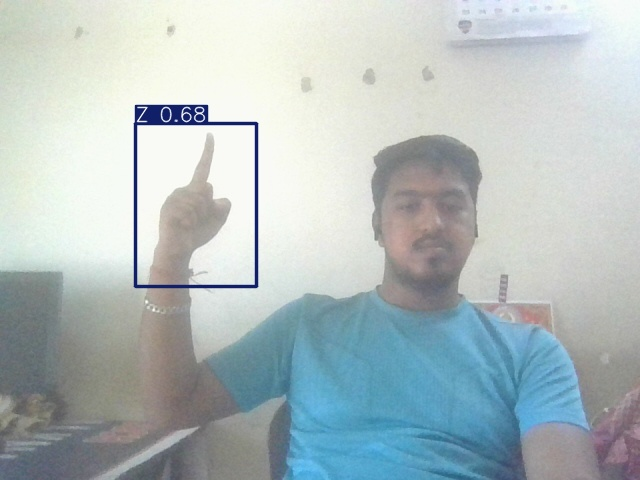

In [ ]:
Image("/content/runs/detect/predict2/myphoto.jpg", width=600)

**Step # 08 Inference with Custom Model on Videos**

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 1 Protective Helmet, 48.5ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 12.5ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.5ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.2ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.9ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 9.6ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 3 Protective Helmets, 8.8ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 2 Jackets, 2 Protective Helmets, 9.3ms
video 1/1 (frame 9/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 2 Prote

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)